We are an agency helping our customers purchase XoX (a made-up product) from various makers. Price is one of the most important things we care about. We need to estimate the price of a XoX before we recommend it to our customers. However, the estimations vary significantly with our employees' experience. 

We would like you to build a machine learning model to accurately predict the price for a future purchase and provide insights to help us explain the predicted price to our customers. Please note that neither our customers nor us have any knowledge about machine learning. A sample of our sales record is available in ../data/sales.csv.


1. Preprocess, clean, analyze and visualized the provided data. A few sentences or plots describing your approach will suffice. Any thing you would like us to know about the price?
2. Build a machine learning model to help us determine the price for a purchase. Discuss why you choose the approaches, what alternatives you consider, and any concerns you have. How is the performance of your model?
3. Help us understand how the price is predicted (again, a few sentences will suffice).

# Preprocess, clean, analyze and visualized the provided data

In [1]:
import pandas as pd

df = pd.read_csv('../data/sales.csv')
df.dropna(subset=['price'], inplace=True)

In [2]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [3]:
df.columns

Index(['cost', 'price', 'weight', 'purchase_date', 'product_type',
       'product_level', 'maker', 'ingredient', 'height', 'width', 'depth'],
      dtype='object')

In [4]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196],
           dtype='int64', length=3186)

In [5]:
len(df.index)

3186

In [6]:
len(df.columns)

11

In [7]:
df['price']

0         $300,492
1         $430,570
2         $213,070
3         $229,174
4         $122,659
           ...    
3192       $93,349
3193       $40,384
3194    $1,074,844
3195       $55,931
3196       $44,370
Name: price, Length: 3186, dtype: object

In [8]:
df[['price']]

,price
0,"$300,492"
1,"$430,570"
2,"$213,070"
3,"$229,174"
4,"$122,659"
...,...
3192,"$93,349"
3193,"$40,384"
3194,"$1,074,844"
3195,"$55,931"


In [9]:
def cost2num(x):
    """
    This function transform cost string to numerical value.
    """
    if type(x) == str: 
        x = x.strip('$').strip('k')
    return float(x)*1000

In [10]:
df['cost_num'] = df.cost.map(cost2num)

In [11]:
def price2num(x):
    """
    This function transform price string to numerical value.
    """
    if type(x) == str: # only works when x is a string
        x = x.strip('$') # remove the dollar sign at the front of the substring
        x = x.replace(',', '') # remove ','
    return float(x)

In [12]:
df['price'] = df.price.map(price2num)

In [13]:
def weight2num(x):
    """
    This function transform weight string to numerical value. The unit kept is Ton
    """
    if type(x) == str: # only works when x is a string
        x = x.strip(' Kg') # remove the ' Kg' at the end of the substring
        x = x.replace(' Ton ', '.') # remove ' Ton '
    return float(x)

In [14]:
df['weight'] = df.weight.map(weight2num)

In [15]:
def height2num(x):
    """
    This function transform height string to numerical value. The unit kept is meters
    """
    if type(x) == str: # only works when x is a string
        x = x.strip(' meters') # remove the ' meters' at the end of the substring
    return float(x)

In [16]:
df['height'] = df.height.map(height2num)

In [17]:
def width2num(x):
    """
    This function transform width string to numerical value. The unit kept is cm
    """
    if type(x) == str: # only works when x is a string
        x = x.strip(' cm') # remove the ' cm' at the end of the substring
    return float(x)

In [18]:
df['width'] = df.width.map(width2num)

In [19]:
def depth2num(x):
    """
    This function transform depth string to numerical value. The unit kept is cm
    """
    if type(x) == str: # only works when x is a string
        x = x.strip(' cm') # remove the ' cm' at the end of the substring
    return float(x)

In [20]:
df['depth'] = df.depth.map(depth2num)

3157

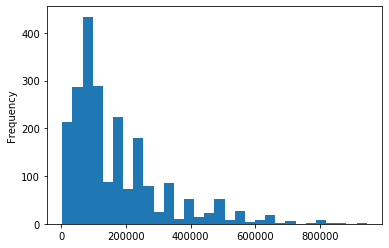

In [21]:
%matplotlib inline 
df.cost_num.plot(kind='hist', bins=30)
len(df['price'].unique())

#  visualize  cost

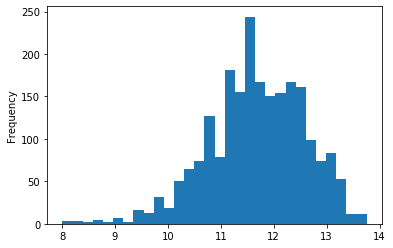

In [22]:
import numpy as np

df.cost_num.map(np.log).plot(kind='hist', bins=30)


#  visualize price

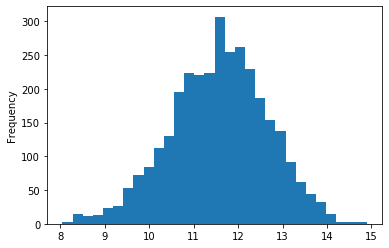

In [23]:
df.price.map(np.log).plot(kind = 'hist', bins = 30)

# Price looks log-normal

 # visualize weight

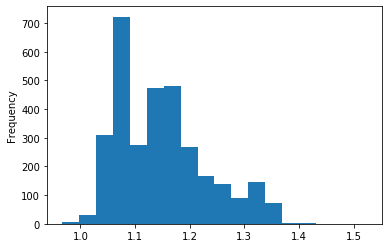

In [24]:
df.weight.map(np.log).plot(kind = 'hist', bins = 18)

# visualize height

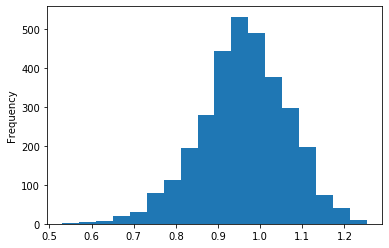

In [25]:
df.height.map(np.log).plot(kind = 'hist', bins = 18)

#  visualize width

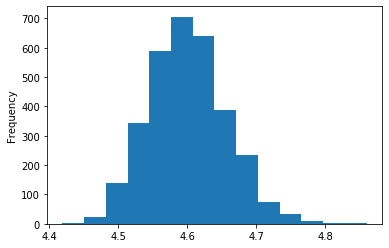

In [26]:
df.width.map(np.log).plot(kind = 'hist', bins = 14)

 # visualize depth

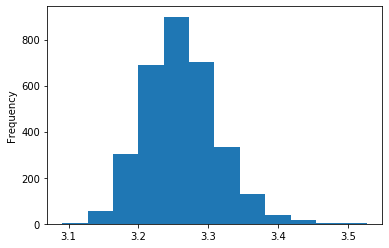

In [27]:
df.depth.map(np.log).plot(kind = 'hist', bins = 12)

#  visualize product_type

# Everything looks log-normal, except for weight, which seems to be right-skewed

In [28]:
df.product_type.unique()

array(['Q,B', 'J,D', 'U', 'D,R', 'H', 'S', 'B,A', 'K,D', 'N', 'U,A', 'D',
       'H,A', 'G', 'D,A', 'T,H', 'D,H', 'F', 'A', 'Q,A', 'W', 'F,D', 'R',
       'P,H', 'C', 'Q,H', 'U,H', 'J', 'N,D', 'F,H', 'Q,D', 'V,H', 'W,D',
       'S,N', 'N,U', 'F,U', 'P,P', 'S,A', 'U,R', 'J,B', 'I,M', 'B,D',
       'H,M', 'S,U', 'K,H', 'S,B', 'T,D', 'F,A', 'K', 'V', 'N,A', 'B',
       'R,V', 'E', 'U,D', 'L,A', 'L', 'K,A', 'S,D', 'Q,N', 'T,A', 'O',
       'B,R', 'N,L', 'K,S'], dtype=object)

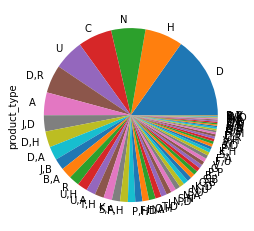

In [29]:
%matplotlib inline 
df.product_type.value_counts().plot(kind='pie')

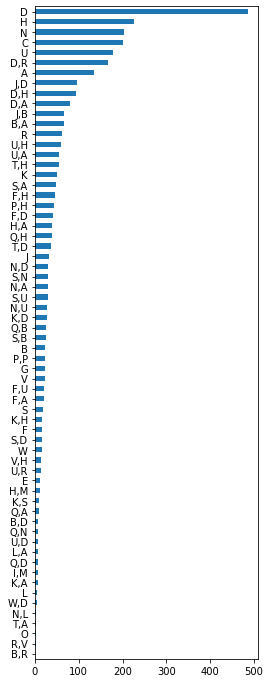

In [30]:
df.product_type.value_counts(ascending=True).plot(kind='barh', figsize=(4,12))

#  visualize product_level

In [31]:
df.product_level.unique()

array(['advanced', 'basic', 'super advanced', 'intermediate', 'unrated'],
      dtype=object)

In [32]:
df.product_level.value_counts()

advanced          1320
super advanced    1222
intermediate       532
basic              111
unrated              1
Name: product_level, dtype: int64

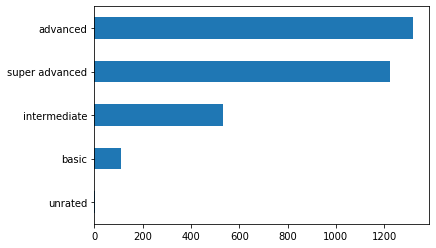

In [33]:
df.product_level.value_counts(ascending = True).plot(kind = 'barh')

#  visualize maker and ingredient

In [34]:
df.maker.unique()

array(['M14122', nan, 'M14123', 'M14124', 'M14125', 'M14126', 'M14127',
       'M14128', 'M14129', 'M14130', 'M14131', 'M14132', 'M14133',
       'M14134,M14135', 'M14136', 'M14137', 'M14138,M14139', 'M14140',
       'M14141', 'M14142', 'M14143', 'M14144', 'M14145', 'M14146',
       'M14147', 'M14148', 'M14149', 'M14150', 'M14151', 'M14152',
       'M14153', 'M14154', 'M14155', 'M14156', 'M14157', 'M14158',
       'M14159', 'M14160', 'M14161', 'M14162', 'M14163', 'M14164',
       'M14165', 'M14166', 'M14167', 'M14168', 'M14169', 'M14170',
       'M14171', 'M14172', 'M14173', 'M14174', 'M14175', 'M14176',
       'M14177', 'M14178', 'M14179', 'M14180', 'M14181', 'M14182',
       'M14183', 'M14184', 'M14185', 'M14186', 'M14187', 'M14188',
       'M14189', 'M14190', 'M14191', 'M14192', 'M14193,M14194', 'M14195',
       'M14196', 'M14197', 'M14198,M14199', 'M14200', 'M14201', 'M14202',
       'M14194', 'M14203', 'M14204', 'M14205', 'M14206', 'M14207',
       'M14208', 'M14209', 'M14210', 'M

In [35]:
df.maker.value_counts()

M14196    17
M14346    16
M14163    15
M14170    15
M14164    13
          ..
M14348     1
M14523     1
M14970     1
M14807     1
M14587     1
Name: maker, Length: 879, dtype: int64

In [36]:
df.ingredient.value_counts()

IN732638                                                                            8
IN732362                                                                            6
IN732502                                                                            4
IN732832                                                                            4
IN732993                                                                            4
                                                                                   ..
IN732632,IN732890,IN732201,IN732874,IN732220,IN732495,IN733346,IN733228,IN733313    1
IN732466,IN732748                                                                   1
IN732583,IN732411                                                                   1
IN732217,IN732104,IN732219                                                          1
IN732591,IN732718,IN732137,IN733654                                                 1
Name: ingredient, Length: 2824, dtype: int64

In [37]:
def breakup(x):
    if type(x) == str: # only works for string input
        parts = x.split(',')
        return parts

In [38]:
dict_maker = {}
for maker in df[df.maker.notnull()].maker.map(breakup):
    for m in maker:
        if m in dict_maker.keys():
            dict_maker[m] += 1
        else:
            dict_maker[m] = 1

In [39]:
sorted(dict_maker.items(), key = lambda x: x[1], reverse = True)

[('M14196', 17),
 ('M14346', 16),
 ('M14163', 15),
 ('M14170', 15),
 ('M14565', 14),
 ('M14164', 13),
 ('M14216', 12),
 ('M14313', 12),
 ('M14427', 12),
 ('M14128', 11),
 ('M14253', 11),
 ('M14286', 11),
 ('M14319', 11),
 ('M14505', 11),
 ('M14206', 10),
 ('M14374', 10),
 ('M14457', 10),
 ('M14166', 9),
 ('M14184', 9),
 ('M14194', 9),
 ('M14205', 9),
 ('M14209', 9),
 ('M14218', 9),
 ('M14273', 9),
 ('M14283', 9),
 ('M14504', 9),
 ('M14664', 9),
 ('M14743', 9),
 ('M14122', 8),
 ('M14126', 8),
 ('M14149', 8),
 ('M14188', 8),
 ('M14211', 8),
 ('M14241', 8),
 ('M14257', 8),
 ('M14289', 8),
 ('M14291', 8),
 ('M14298', 8),
 ('M14312', 8),
 ('M14317', 8),
 ('M14340', 8),
 ('M14441', 8),
 ('M14455', 8),
 ('M14464', 8),
 ('M14545', 8),
 ('M14136', 7),
 ('M14145', 7),
 ('M14156', 7),
 ('M14159', 7),
 ('M14172', 7),
 ('M14228', 7),
 ('M14232', 7),
 ('M14245', 7),
 ('M14261', 7),
 ('M14287', 7),
 ('M14295', 7),
 ('M14310', 7),
 ('M14315', 7),
 ('M14324', 7),
 ('M14325', 7),
 ('M14334', 7),
 ('M143

In [40]:
dict_ingredient = {}
for ingred in df[df.ingredient.notnull()].ingredient.map(breakup):
    for i in ingred:
        if i in dict_ingredient.keys():
            dict_ingredient[i] += 1
        else:
            dict_ingredient[i] = 1

In [41]:
sorted(dict_ingredient.items(), key = lambda x: x[1], reverse = True)

[('IN732658', 64),
 ('IN732094', 51),
 ('IN732489', 44),
 ('IN732074', 42),
 ('IN732583', 41),
 ('IN732505', 40),
 ('IN732097', 39),
 ('IN732231', 36),
 ('IN732503', 36),
 ('IN732130', 34),
 ('IN732217', 34),
 ('IN732559', 34),
 ('IN732082', 33),
 ('IN732159', 33),
 ('IN732338', 33),
 ('IN732502', 33),
 ('IN732591', 33),
 ('IN732108', 32),
 ('IN732121', 32),
 ('IN732595', 32),
 ('IN732325', 31),
 ('IN732746', 31),
 ('IN732073', 30),
 ('IN732305', 30),
 ('IN732306', 30),
 ('IN732415', 30),
 ('IN732738', 30),
 ('IN732654', 29),
 ('IN732239', 28),
 ('IN732295', 28),
 ('IN732395', 28),
 ('IN732435', 28),
 ('IN732466', 28),
 ('IN732528', 28),
 ('IN732566', 28),
 ('IN732580', 28),
 ('IN732692', 28),
 ('IN732743', 28),
 ('IN732993', 28),
 ('IN732062', 27),
 ('IN732101', 27),
 ('IN732158', 27),
 ('IN732213', 27),
 ('IN732254', 27),
 ('IN732257', 27),
 ('IN732282', 27),
 ('IN732368', 27),
 ('IN732562', 27),
 ('IN732987', 27),
 ('IN732112', 26),
 ('IN732122', 26),
 ('IN732255', 26),
 ('IN732275'

# Build a machine learning model to help us determine the price for a purchase

# study what featueres are highly correlated.

In [42]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv('../data/sales.csv')

In [44]:
df.dropna(subset=['price'], inplace=True)

In [45]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year
train_raw = df[df.year < 2015]
test_raw = df[df.year >= 2015]

In [46]:
train_raw.columns

Index(['cost', 'price', 'weight', 'purchase_date', 'product_type',
       'product_level', 'maker', 'ingredient', 'height', 'width', 'depth',
       'year'],
      dtype='object')

In [47]:
df_train = train_raw[['price', 'cost', 'weight', 'height', 'depth', 'width']]

In [48]:
class FeatureTransformer(object):
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X['cost'].aggregate(self.cost2num)
        df['price'] = X['price'].aggregate(self.price2num)
        df['height'] = X['height'].aggregate(self.height2num)
        df['depth'] = X['depth'].aggregate(self.depth2num)
        df['width'] = X['width'].aggregate(self.depth2num)
        df['weight'] = X['weight'].aggregate(self.weight2num)
        self.means = df.mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X['cost'].aggregate(self.cost2num)
        df['price'] = X['price'].aggregate(self.price2num)
        df['height'] = X['height'].aggregate(self.height2num)
        df['depth'] = X['depth'].aggregate(self.depth2num)
        df['width'] = X['width'].aggregate(self.depth2num)
        df['weight'] = X['weight'].aggregate(self.weight2num)
  
        df['cost'].fillna(self.means['cost'], inplace=True)
        df['price'].fillna(self.means['price'], inplace=True)
        df['height'].fillna(self.means['height'], inplace=True)
        df['depth'].fillna(self.means['depth'], inplace=True)
        df['width'].fillna(self.means['width'], inplace=True)
        df['weight'].fillna(self.means['weight'], inplace=True)

        return df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
    @staticmethod
    def cost2num(series):
        return series.str.replace('$','').str.replace('k','').astype(float)*1000
    
    @staticmethod
    def price2num(series):
        return series.str.replace('$','').str.replace(',','').astype(float)
    
    @staticmethod
    def height2num(series):
        return series.str.replace(' meters', '').astype(float)
    
    @staticmethod
    def depth2num(series):
        return series.str.replace(' cm', '').astype(float)
    
    @staticmethod
    def weight2num(series):
        def get_weight(x):
            try:
                return 1000 * float(x[0]) + float(x[1])
            except TypeError:
                return x

        df_weight = series.str.replace(' Kg', '').str.split(' Ton ')
        return df_weight.map(get_weight)

In [49]:
train = FeatureTransformer().fit_transform(df_train)

In [50]:
corr = train.corr(method='pearson')
corr

,cost,price,height,depth,width,weight
cost,1.000000,0.553216,0.078255,0.087628,0.086243,0.301896
price,0.553216,1.000000,0.088912,0.076002,0.074005,0.301342
height,0.078255,0.088912,1.000000,-0.833685,-0.848096,0.175936
depth,0.087628,0.076002,-0.833685,1.000000,0.979237,0.349840
width,0.086243,0.074005,-0.848096,0.979237,1.000000,0.358753
weight,0.301896,0.301342,0.175936,0.349840,0.358753,1.000000


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

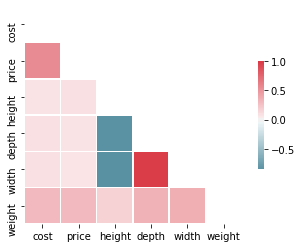

In [52]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

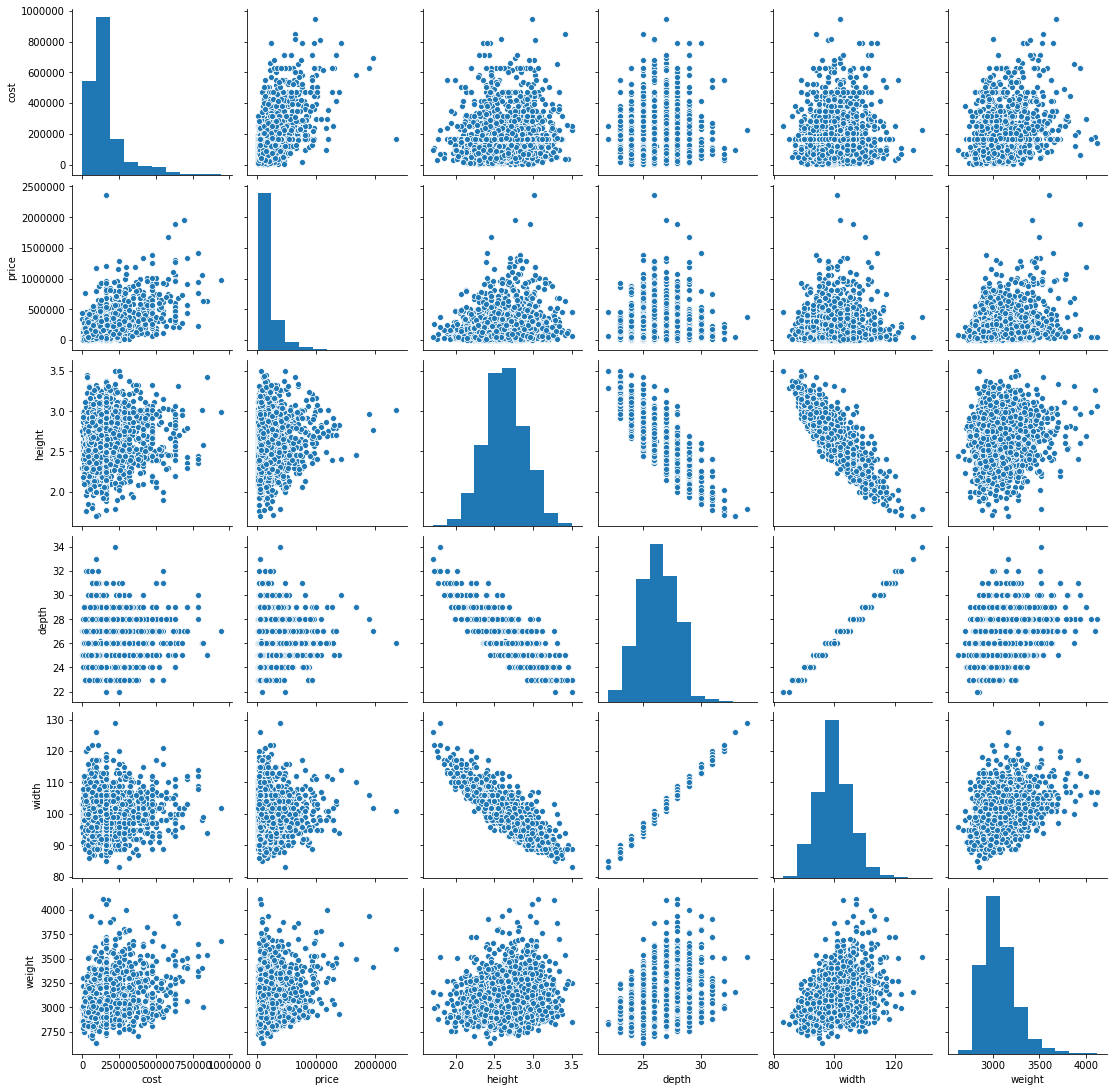

In [53]:
sns.pairplot(train)

# from above, we can see that price is highly correlated to cost

 # Collinearity

In [54]:
def any2num(x):
    """
    This function transform any string to numerical value.
    """
    if type(x) == str:
        # For price & cost
        if '$' in x:
            x = x.strip('$').replace(",", "")
            if 'k' in x:
                x = x.replace("k", "000")

        # For weight
        elif 'Kg' in x:
            x_split = x.strip(' Kg').split(' ')
            if 'Ton' in x_split:
                x = int(x_split[0]) * 1000 + int(x_split[-1])
            else:
                x = x_split[-1]
    
        # For width & depth 
        elif 'cm' in x:
            x = x.strip(' cm')

        # For Height
        elif 'meters' in x:
            x = x.strip(' meters')
            
        return float(x)
    else:
        return x

In [55]:
class FeatureTransformer(object):
    def __init__(self, columns=['cost', 'weight', 'height', 'width', 'depth']):
            self.columns = columns
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        for col in self.columns:
            df[col] = X[col].map(any2num)
        self.mean = df.mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        for col in self.columns:
            df[col] = X[col].map(any2num)
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
def print_errors(y_train, y_pred_train, y_test, y_pred_test):
    print(f"Train Loss | \tMAE: {mean_absolute_error(y_train, y_pred_train):.2e}"
          f"\tMSE:  {mean_squared_error(y_train, y_pred_train):.2e}"
          f"\tR^2:  {r2_score(y_train, y_pred_train):.4f}")
    print(f"Test Loss | \tMAE: {mean_absolute_error(y_test, y_pred_test):.2e}"
          f"\tMSE:  {mean_squared_error(y_test, y_pred_test):.2e}"
          f"\tR^2:  {r2_score(y_test, y_pred_test):.4f}")
    
def train_pipeline_and_predict(steps, X_train, y_train, X_test):
    model = Pipeline(steps)
    model = model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print_errors(y_train, y_pred_train, y_test, y_pred_test)
    
    return model, y_pred_train, y_pred_test

In [121]:
X_train = train_raw[features]
y_train = train_raw['price'].str.replace('$','').str.replace(',','').astype(float)

X_test = test_raw[features]
y_test = test_raw['price'].str.replace('$','').str.replace(',','').astype(float)

In [176]:
steps = [('ft', FeatureTransformer()),
         ('rescale', MinMaxScaler()),
         ('lr', LinearRegression())]
model, y_pred_train, y_pred_test = train_pipeline_and_predict(steps, X_train, y_train, X_test)

Train Loss | 	MAE: 1.14e+05	MSE:  2.87e+10	R^2:  0.3264
Test Loss | 	MAE: 1.43e+05	MSE:  5.59e+10	R^2:  0.3515


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [63]:
model.named_steps['lr'].intercept_
sorted(zip(features, model.named_steps['lr'].coef_), key=lambda x:x[-1], reverse=True)

[('cost', 849256.8439859146),
 ('weight', 308400.897454421),
 ('depth', 83403.24130902847),
 ('height', -60075.41776478819),
 ('width', -207685.6743317401)]

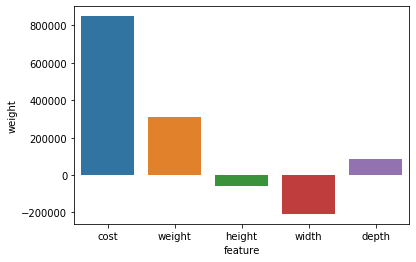

In [64]:
ax = sns.barplot(x=list(range(5)), y=model.named_steps['lr'].coef_)
ax.set(xlabel= 'feature', ylabel='weight', xticklabels=features);

# from above, we can remove height and width.

In [65]:
steps = [('ft', FeatureTransformer(['cost', 'weight', 'depth'])),
         ('rescale', MinMaxScaler()),
         ('lr', LinearRegression())]
model, y_pred_train, y_pred_test = train_pipeline_and_predict(steps, X_train, y_train, X_test)

Train Loss | 	MAE: 1.14e+05	MSE:  2.87e+10	R^2:  0.3264
Test Loss | 	MAE: 1.43e+05	MSE:  5.59e+10	R^2:  0.3515


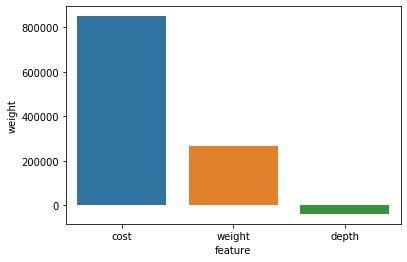

In [66]:
ax = sns.barplot(x=list(range(3)), y=model.named_steps['lr'].coef_)
ax.set(xlabel= 'feature', ylabel='weight', xticklabels=['cost', 'weight', 'depth']);

# Build a machine learning model to determine the price for a purchase

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [68]:
def any2num(x):
    """
    This function transform any string to numerical value.
    """
    if type(x) == str:
        # For price & cost
        if '$' in x:
            x = x.strip('$').replace(",", "")
            if 'k' in x:
                x = x.replace("k", "000")

        # For weight
        elif 'Kg' in x:
            x_split = x.strip(' Kg').split(' ')
            if 'Ton' in x_split:
                x = int(x_split[0]) * 1000 + int(x_split[-1])
            else:
                x = x_split[-1]
    
        # For width & depth 
        elif 'cm' in x:
            x = x.strip(' cm')

        # For Height
        elif 'meters' in x:
            x = x.strip(' meters')
            
        return float(x)
    else:
        return x
    

In [69]:
class FeatureTransformer(object):
    def __init__(self, columns=['cost', 'weight', 'depth']):
            self.columns = columns
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        for col in self.columns:
            df[col] = X[col].map(any2num)
        self.mean = df.mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        for col in self.columns:
            df[col] = X[col].map(any2num)
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [124]:
train_rawnew = train_raw[['price', 'cost', 'weight', 'depth']]

In [71]:
features = list(train_rawnew.columns)
target = 'price'
features.remove(target)

In [72]:
def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',', '')
    return float(x)

In [73]:

X_train = train_raw[features]
y_train = train_raw[target].map(price2num)

X_test = test_raw[features]
y_test = test_raw[target].map(price2num)

In [74]:
def print_errors(y_train, y_pred_train, y_test, y_pred_test):
    print(f"Train Loss | \tMAE: {mean_absolute_error(y_train, y_pred_train):.2e}"
          f"\tMSE:  {mean_squared_error(y_train, y_pred_train):.2e}"
          f"\tR^2:  {r2_score(y_train, y_pred_train):.4f}")
    print(f"Test Loss | \tMAE: {mean_absolute_error(y_test, y_pred_test):.2e}"
          f"\tMSE:  {mean_squared_error(y_test, y_pred_test):.2e}"
          f"\tR^2:  {r2_score(y_test, y_pred_test):.4f}")

In [75]:
steps = [('ft', FeatureTransformer()),
         ('tree', DecisionTreeRegressor())]
model, _, _ = train_pipeline_and_predict(steps, X_train, y_train, X_test)

Train Loss | 	MAE: 2.18e+04	MSE:  3.28e+09	R^2:  0.9231
Test Loss | 	MAE: 1.69e+05	MSE:  8.58e+10	R^2:  0.0045


In [76]:
importances=model[-1].feature_importances_

In [77]:
importances

array([0.52045345, 0.31375982, 0.16578673])

Text(0, 0.5, 'feature_importances')

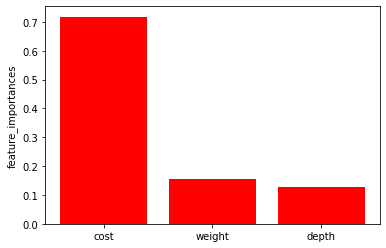

In [165]:
plt.bar(range(len(importances)), importances, color="r", align = "center")
plt.xticks(range(len(importances)), ['cost', 'weight', 'depth'])
plt.ylabel('feature_importances')

# Model with  xgboost

In [248]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance

In [233]:
df = pd.read_csv('../data/sales.csv')
df.dropna(subset=['price'], inplace=True)

In [234]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year
train_raw = df[df.year < 2015].reset_index(drop=True)
test_raw = df[df.year >= 2015].reset_index(drop=True)


In [235]:
def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',', '')
    return float(x)

In [227]:
X_train = train_raw[features]
features = list(train_raw.columns)
target = 'price'
features.remove(target)
y_train = train_raw[target].map(price2num)

X_test = test_raw[features]
y_test = test_raw[target].map(price2num)
X_train
#y_train

,cost,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,year
0,$333k,3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,2008
1,NaN,3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm,1997
2,$270k,3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm,2001
3,$97k,2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm,2000
4,$59k,2 Ton 930 Kg,Aug 19 2011,H,super advanced,M14124,"IN732067,IN732068,IN732069,IN732070,IN732071,I...",2.71 meters,96 cm,25 cm,2011
...,...,...,...,...,...,...,...,...,...,...,...
2752,$254k,3 Ton 40 Kg,Apr 20 2012,D,intermediate,M14261,"IN732220,IN732456,IN733681,IN732831,IN733123,I...",2.02 meters,113 cm,30 cm,2012
2753,$91k,2 Ton 890 Kg,Jul 12 2002,D,advanced,M14904,"IN732503,IN732583,IN732373,IN732338,IN732347,I...",2.52 meters,99 cm,26 cm,2002
2754,NaN,2 Ton 830 Kg,May 25 2007,"J,B",intermediate,M14578,"IN732832,IN732166,IN733162,IN733785,IN732069,I...",2.15 meters,106 cm,28 cm,2007
2755,$44k,2 Ton 950 Kg,Apr 12 2002,R,advanced,M14341,IN732587,2.52 meters,100 cm,26 cm,2002


In [228]:
steps = [('ft', FeatureTransformer()),
         ('Rescale', MinMaxScaler()),
         ('xgbr', XGBRegressor())]
model = Pipeline(steps)


In [229]:
model.fit(X_train, y_train)

[22:49:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('ft',
                 <__main__.FeatureTransformer object at 0x00000179BD0926C8>),
                ('Rescale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('xgbr',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1))],
         verbose=False)

In [230]:
y_train_pred = model.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 9.65e+04
train MSE: 2.07e+10
train R2: 0.513


y_train_pred = model.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

In [231]:
y_test_pred = model.predict(X_test)
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.26e+05
test MSE: 5.37e+10
test R2: 0.377


In [236]:
importances=model[-1].feature_importances_

In [237]:
importances

array([0.71820074, 0.15562123, 0.12617804], dtype=float32)

Text(0, 0.5, 'feature_importances')

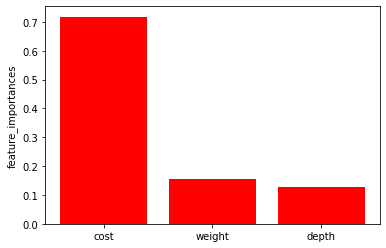

In [238]:
plt.bar(range(len(importances)), importances, color="r", align = "center")
plt.xticks(range(len(importances)), ['cost', 'weight', 'depth'])
plt.ylabel('feature_importances')

# The model is reasonble to predict the price with good scores.

In [258]:
parameters = {'xgbr__gamma': [0.0, 0.1, 0.2, 0.3], 'xgbr__learning_rate': [0.05, 0.1], 'xgbr__n_estimators': [100, 300, 500], 'xgbr__max_depth': [3, 5, 10], 'xgbr__lambda': [0.5, 1, 5], 'xgbr__min_child_weight': [3, 5, 7]}

In [259]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

In [241]:
steps = [('ft', FeatureTransformer()),
         ('Rescale', MinMaxScaler()),
         ('xgbr', XGBRegressor())]
model = Pipeline(steps)


In [260]:
model_gsv = GridSearchCV(model, parameters, cv = 5, scoring = scorer)

In [261]:
model_gsv = model_gsv.fit(X_train, y_train)

[23:35:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:35:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:35:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:35:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:36:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:36:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:36:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:37:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:37:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:37:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:37:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:38:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:38:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:38:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:39:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:39:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:39:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:40:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:40:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:40:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:41:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:41:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:41:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:42:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:42:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:42:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:42:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:43:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:43:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:43:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:43:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:44:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:44:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:45:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:45:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:45:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:46:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:46:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:46:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:46:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:47:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:47:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:48:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:48:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [267]:
model_gsv.best_params_

{'xgbr__gamma': 0.0,
 'xgbr__lambda': 0.5,
 'xgbr__learning_rate': 0.05,
 'xgbr__max_depth': 3,
 'xgbr__min_child_weight': 3,
 'xgbr__n_estimators': 100}

In [265]:
y_train_pred = model_gsv.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 9.93e+04
train MSE: 2.31e+10
train R2: 0.459


In [266]:
y_test_pred = model_gsv.predict(X_test)
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.25e+05
test MSE: 5.32e+10
test R2: 0.382


In [273]:
importances = model_gsv.best_estimator_[-1].feature_importances_
importances

array([0.78625154, 0.14248171, 0.07126671], dtype=float32)

Text(0, 0.5, 'feature_importances')

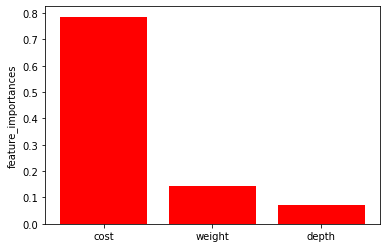

In [271]:
plt.bar(range(len(importances)), importances, color="r", align = "center")
plt.xticks(range(len(importances)), ['cost', 'weight', 'depth'])
plt.ylabel('feature_importances')